PDF Analysen

In [82]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import pickle

Lade die Daten vom Pickle

In [83]:
pickle_path = "./data/pickle_jar/"

with open(pickle_path + "comp_pdf.pickle","rb") as file:
    df = pickle.load(file)

DataFrame anpassen

In [84]:
df.set_index('file_url',inplace=True)

df.head(5)

,id,PDF_compare
file_url,,
gmbl-ausgabe-1956-5.pdf,240723,"[True, True, True, True, True, True, True, Tru..."
gmbl-ausgabe-1968-31.pdf,240724,[]
gmbl-ausgabe-2019-59.pdf,240725,"[True, True, True, True, True, True, True, Tru..."
gmbl-ausgabe-1997-12.pdf,240726,"[True, True, True, True, True, True, True, Tru..."
gmbl-ausgabe-2018-31.pdf,240727,"[True, True, True, True, True, True, True, Tru..."


In [85]:
df["PDF_compare2"] = df["PDF_compare"].apply(lambda x: [y == True for y in x])
df["sum"] = df["PDF_compare2"].apply(np.sum)
df["len"] = df["PDF_compare2"].apply(len)
df["ratio"] = df["sum"] / df["len"]

df.head(5)

,id,PDF_compare,PDF_compare2,sum,len,ratio
file_url,,,,,,
gmbl-ausgabe-1956-5.pdf,240723,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",928.0,932,0.995708
gmbl-ausgabe-1968-31.pdf,240724,[],[],0.0,0,NaN
gmbl-ausgabe-2019-59.pdf,240725,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",2281.0,2365,0.964482
gmbl-ausgabe-1997-12.pdf,240726,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",1429.0,1432,0.997905
gmbl-ausgabe-2018-31.pdf,240727,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",884.0,888,0.995495


In [86]:
print(df.shape)

df["ratio"].isna().sum()
print("Anzahl NA in ratio Spalte")

(2713, 6)
Anzahl NA in ratio Spalte


In [87]:
show_na_ratio = df["ratio"]

In [88]:
df.loc["gmbl-ausgabe-1950-1.pdf"]

id                                                         242941
PDF_compare     [True, True, True, True, True, True, True, Tru...
PDF_compare2    [True, True, True, True, True, True, True, Tru...
sum                                                        6584.0
len                                                          6593
ratio                                                    0.998635
Name: gmbl-ausgabe-1950-1.pdf, dtype: object

Entfernen der Nan um den DataFrame klein zu halten

In [89]:
df.dropna(axis=0, inplace=True)
df.shape

(1659, 6)

etwas mehr Daten Analyse

In [90]:
df["PDF_compare3"] = df["PDF_compare"] 
df["PDF_compare4"] = df["PDF_compare3"].apply(lambda x: [y == True for y in x])
df["PDF_compare5"] = df["PDF_compare3"].apply(lambda x: [y for y in x if y !=True])
df["error_len"] = df["PDF_compare5"].apply(len)
df["error_ele_len"] = df["PDF_compare5"].apply(lambda x: [len(y) for y in x if y])
df["error_ele_len_max"] = df["error_ele_len"][(df["error_len"] > 0)].apply(max)
df["error_ele_len_min"] = df["error_ele_len"][(df["error_len"] > 0)].apply(min)
df["error_ele_len_mean"] = df["error_ele_len"][(df["error_len"] > 0)].apply(np.mean)
df['Year'] = [int(i.split('-')[2]) for i in df.index]

df["sum2"] = df["PDF_compare4"].apply(np.sum)
df["len2"] = df["PDF_compare4"].apply(len)
df["ratio2"] = df["sum2"] / df["len2"]

df.shape

(1659, 18)

In [91]:
df.loc["gmbl-ausgabe-1950-1.pdf"]["PDF_compare5"]

['(1}DerBetroffenesollvorErlaßderVerfügungge-',
 'NachdieserUebersichtistderdurch5chniü;i}cheﬂAnie:a%',
 'diesemDurchschnittliegenbeidenBeamtendasBundes»«',
 'wesen,dasBundesministeriumfürAngelegenheitender',
 'Vertriebenen,dasBundesministeriumfürg:gesamte:ieu.i*s{_cha',
 'dasBundesministeriumderJustiz,',
 '—DirektionArbeit—',
 ';920241',
 'Wiesbaden,Beriramstr.3']

In [92]:
show_error_text = df["PDF_compare5"]

Okay was ist das?

In [93]:
df.loc["gmbl-ausgabe-2005-63.pdf"]

id                                                               241255
PDF_compare           [True, True, True, True, desBeauftragtenderBun...
PDF_compare2          [True, True, True, True, False, False, False, ...
sum                                                              1424.0
len                                                                2576
ratio                                                          0.552795
PDF_compare3          [True, True, True, True, desBeauftragtenderBun...
PDF_compare4          [True, True, True, True, False, False, False, ...
PDF_compare5          [desBeauftragtenderBundesregierungf(cid:1)rKul...
error_len                                                          1152
error_ele_len         [57, 89, 115, 105, 118, 81, 73, 54, 58, 62, 67...
error_ele_len_max                                                 118.0
error_ele_len_min                                                  12.0
error_ele_len_mean                                            48

In [94]:
df.loc["gmbl-ausgabe-2005-63.pdf"]["PDF_compare5"]

['desBeauftragtenderBundesregierungf(cid:1)rKulturundMedien',
 'desAusw(cid:2)rtigenAmtes/desBundesministeriumsdesInnern/desBundesministeriumsderFinanzen',
 'desBundesministeriumsf(cid:1)rWirtschaftundTechnologie/desBundesministeriumsf(cid:1)rErn(cid:2)hrung,Landwirtschaft',
 'undVerbraucherschutz/desBundesministeriumsf(cid:1)rFamilie,Senioren,FrauenundJugend/desBundesministeriums',
 'f(cid:1)rGesundheit/desBundesministeriumsf(cid:1)rVerkehr,BauundStadtentwicklung/desBundesministeriumsf(cid:1)rUmwelt,',
 'NaturschutzundReaktorsicherheit/desBundesministeriumsf(cid:1)rBildungundForschung',
 'desBundesministeriumsf(cid:1)rwirtschaftlicheZusammenarbeitundEntwicklung',
 'Programmv.28.9.05desBMIzurF(cid:1)rderungdesLeistungs-',
 'Richtlinienv.10.10.05desBMI(cid:2)berdieGew(cid:3)hrungvon',
 'ZuwendungenzurF(cid:1)rderungvonBundessportfachverb(cid:3)nden',
 '(F(cid:1)rderrichtlinienVerb(cid:3)nde–FRV)....................1276',
 'Richtlinienv.10.10.05desBMI(cid:2)berdieGew(cid:3)hrungvon',
 'Z

gmbl-ausgabe-2005-63.pdf Diese Ausgabe, hat verschiedene Codierungen für Umlaute.
Verschiedene PDF Viewer erkennen mehr oder weniger davon richtig.

Mein kleiner Fix!
Diese Codierung kann richtig angezeit werden, entsprechend wird dieser Fehler von False zu True geändert.

In [95]:
def fix_cid(list_pdf_com):
    a= []
    for i in list_pdf_com:
        if type(i) == str and "(cid:" in i:
            a.append(True)
        else:
            a.append(i)
    return a

In [96]:
df["PDF_compare3"] = df["PDF_compare"].map(fix_cid)
df["PDF_compare4"] = df["PDF_compare3"].apply(lambda x: [y == True for y in x])
df["PDF_compare5"] = df["PDF_compare3"].apply(lambda x: [y for y in x if y !=True])
df["error_len"] = df["PDF_compare5"].apply(len)
df["error_ele_len"] = df["PDF_compare5"].apply(lambda x: [len(y) for y in x if y])
df["error_ele_len_max"] = df["error_ele_len"][(df["error_len"] > 0)].apply(max)
df["error_ele_len_min"] = df["error_ele_len"][(df["error_len"] > 0)].apply(min)
df["error_ele_len_mean"] = df["error_ele_len"][(df["error_len"] > 0)].apply(np.mean)
df['Year'] = [int(i.split('-')[2]) for i in df.index]

df["sum2"] = df["PDF_compare4"].apply(np.sum)
df["len2"] = df["PDF_compare4"].apply(len)
df["ratio2"] = df["sum2"] / df["len2"]

df.shape

(1659, 18)

In [97]:
show_ratios = df[["ratio", "ratio2"]]

In [98]:
print("Summe 100% richtig, ratio")
print(df["ratio"][df["ratio"] == 1].sum())
print("Summe 100% richtig, ratio2")
print(df["ratio2"][df["ratio2"] == 1].sum())
df.shape

Summe 100% richtig, ratio
559.0
Summe 100% richtig, ratio2
673.0


(1659, 18)

Diese Korrektur hat Fehler korrigiert, die je nach PDF Viewer richtig angezeigt werden.

Suche nach PDFs mit Text der nicht markierbar ist, aber in der PDF hinterlegt sind.
Diese kann bei verschiedenen PDF Viewer unteschiedlich sein.

PDFs von 2003 bis 2023

In [99]:
print("fehlerfreie PDF")
print(((df["Year"] > 2002) & (df["ratio"] == 1)).sum())

print("fehlerfrei nach 'cid:'-Platzhalter Korrektur")
print(((df["Year"] > 2002) & (df["ratio2"] == 1)).sum())

print("von insgesammt:")
df["ratio"][df["Year"] > 2002].count()

fehlerfreie PDF
132
fehlerfrei nach 'cid:'-Platzhalter Korrektur
199
von insgesammt:


824

Suche nach PDFs die Textblöcke haben, die höchstwahrscheinlich nicht markiert werden können.

In [100]:
big_error = df[["error_len", "PDF_compare5"]][(df["error_len"] > 7) 
                                            & (df["error_ele_len_max"] > 40) 
                                            & (df["error_ele_len_mean"] > 19) 
                                            & (df["Year"] > 2002)]

<Axes: xlabel='Year'>

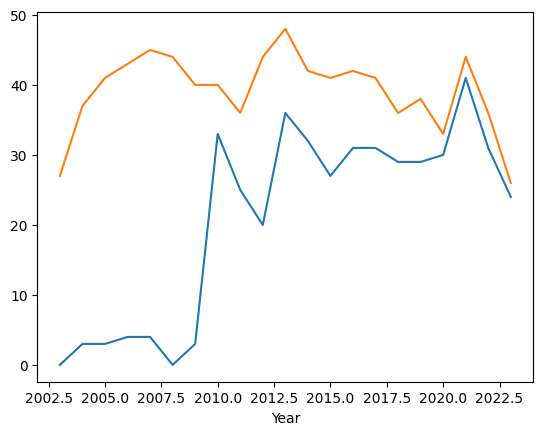

In [101]:
df["plotme"] = (df["error_len"] > 7) & (df["error_ele_len_max"] > 40) & (df["error_ele_len_mean"] > 19) & (df["Year"] > 2002)
df[df["Year"] > 2002].groupby("Year")["plotme"].sum().plot()
df[df["Year"] > 2002].groupby("Year")["plotme"].count().plot()

Hat um 2010 das Innenministerium angefangen selbst PDFs zu erstellen?